# IMPORTING LIBRARIES

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import pickle

# DATA COLLECTION

In [4]:
df = pd.read_csv('./spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EXPLORATORY DATA ANALYSIS

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

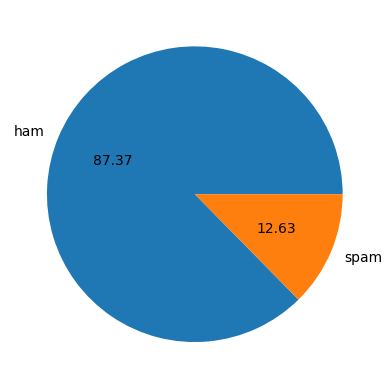

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [19]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

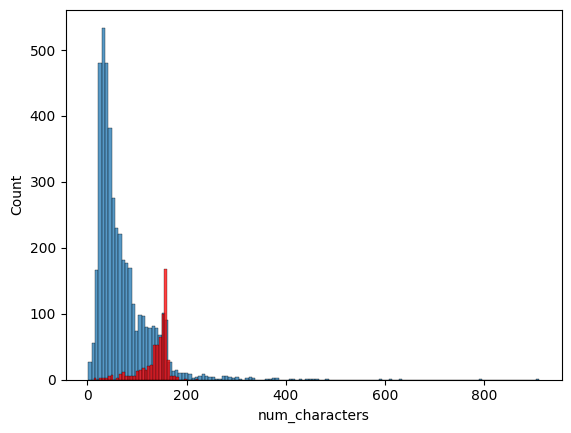

In [27]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

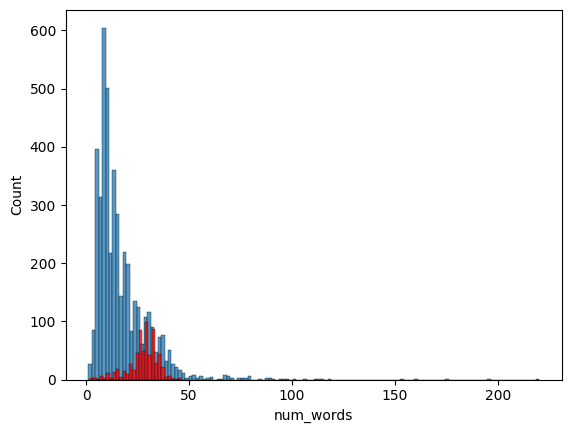

In [28]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: >

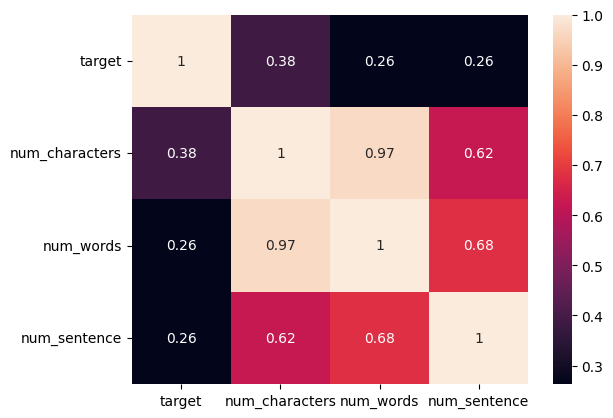

In [29]:
df1=df.copy()
df1.drop('text', axis=1, inplace=True)
sns.heatmap(df1.corr(),annot=True)

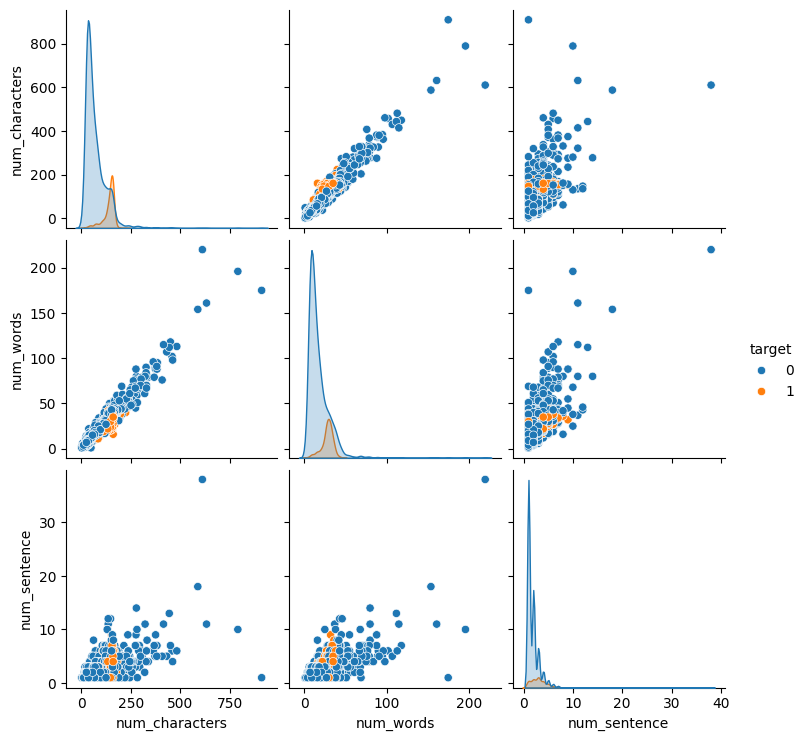

In [30]:
sns.pairplot(df,hue='target')

# DATA PREROCESSING
- Lower Case
- Tokenization
- Removing special characters
- Removing punctuation and stop words
- Stemming

In [31]:
def transforming_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
df['transformed_text']=df['text'].apply(transforming_text)

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [3]:
df.to_csv("checkpoint1.csv")

NameError: name 'df' is not defined

In [48]:
df=pd.read_csv("checkpoint1.csv", index_col=[0])

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

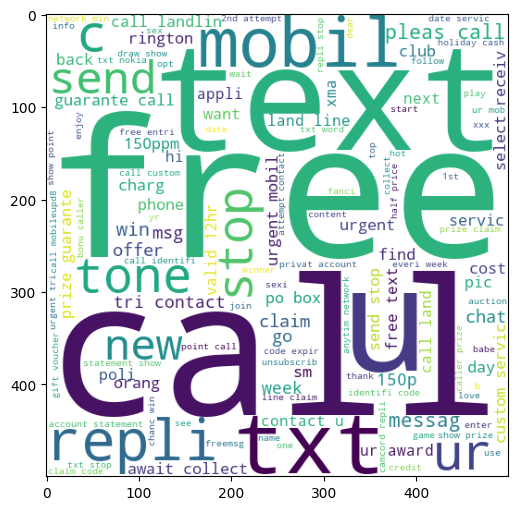

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

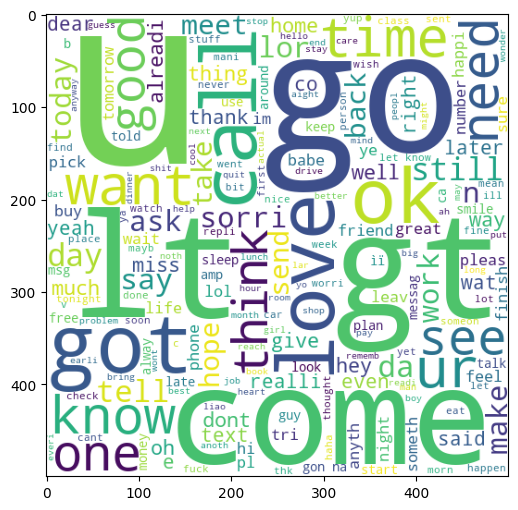

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

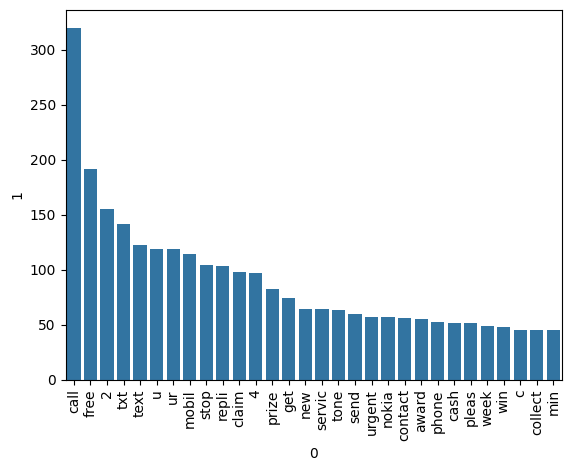

In [58]:
sns.barplot(data=pd.DataFrame(Counter(spam_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    if isinstance(msg, str):  # Check if msg is a string
        for word in msg.split():
            ham_corpus.append(word)


In [60]:
len(ham_corpus)

35404

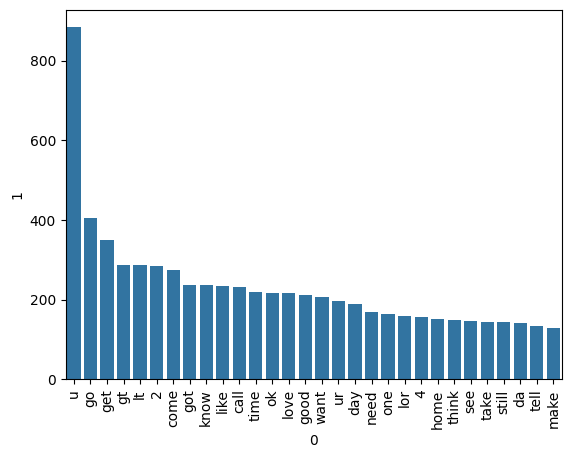

In [61]:
sns.barplot(data=pd.DataFrame(Counter(ham_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [62]:
df['transformed_text'].fillna('', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11560\3474598079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transformed_text'].fillna('', inplace=True)


In [63]:
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(5169, 3000)

In [66]:
y = df['target'].values

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'Support Vector Machine' : svc,
    'K Neighbors' : knc,
    'Multinomial Naives Bayes' : mnb,
    'Gaussian Naives Bayes': gnb,
    'Decision Tree': dtc,
    'Logistic Regression': lrc,
    'Random Forest': rfc,
    'Ada Boost': abc,
    'Gradient Boost':gbdt,
    'Xg Boost':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    return accuracy,precision,recall,f1

In [71]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print(name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 - ",current_f1)
    print("\n")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

Support Vector Machine
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Recall -  0.8405797101449275
F1 -  0.9027237354085603


K Neighbors
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
F1 -  0.449438202247191


Multinomial Naives Bayes
Accuracy -  0.9709864603481625
Precision -  1.0
Recall -  0.782608695652174
F1 -  0.8780487804878049


Gaussian Naives Bayes
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
Recall -  0.8043478260869565
F1 -  0.6218487394957983


Decision Tree
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
Recall -  0.6159420289855072
F1 -  0.7024793388429752


Logistic Regression
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
Recall -  0.7101449275362319
F1 -  0.8200836820083682


Random Forest
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
Recall -  0.8333333333333334
F1 -  0.9019607843137255




d:\spambase\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
Recall -  0.7608695652173914
F1 -  0.8366533864541833


Gradient Boost
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
Recall -  0.6594202898550725
F1 -  0.7679324894514767


Xg Boost
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213
Recall -  0.8188405797101449
F1 -  0.8692307692307693




In [72]:
models = pd.DataFrame({
    'Model': clfs.keys(),
    'Model Accuracy Score': accuracy_scores
})

In [73]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Accuracy Score
0,Support Vector Machine,0.975822
6,Random Forest,0.975822
2,Multinomial Naives Bayes,0.970986
9,Xg Boost,0.967118
7,Ada Boost,0.960348
5,Logistic Regression,0.958414
8,Gradient Boost,0.946809
4,Decision Tree,0.930368
1,K Neighbors,0.905222
3,Gaussian Naives Bayes,0.869439


In [74]:
models1 = pd.DataFrame({
    'Model': clfs.keys(),
    'Model Precision Score': precision_scores
})

In [75]:
models1.sort_values(by='Model Precision Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Precision Score
1,K Neighbors,1.000000
2,Multinomial Naives Bayes,1.000000
6,Random Forest,0.982906
0,Support Vector Machine,0.974790
5,Logistic Regression,0.970297
7,Ada Boost,0.929204
9,Xg Boost,0.926230
8,Gradient Boost,0.919192
4,Decision Tree,0.817308
3,Gaussian Naives Bayes,0.506849


In [76]:
models2 = pd.DataFrame({
    'Model': clfs.keys(),
    'Model Recall Score': recall_scores
})

In [77]:
models2.sort_values(by='Model Recall Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Recall Score
0,Support Vector Machine,0.840580
6,Random Forest,0.833333
9,Xg Boost,0.818841
3,Gaussian Naives Bayes,0.804348
2,Multinomial Naives Bayes,0.782609
7,Ada Boost,0.760870
5,Logistic Regression,0.710145
8,Gradient Boost,0.659420
4,Decision Tree,0.615942
1,K Neighbors,0.289855


In [78]:
models3 = pd.DataFrame({
    'Model': clfs.keys(),
    'Model F1 Score': f1_scores
})

In [79]:
models3.sort_values(by='Model F1 Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model F1 Score
0,Support Vector Machine,0.902724
6,Random Forest,0.901961
2,Multinomial Naives Bayes,0.878049
9,Xg Boost,0.869231
7,Ada Boost,0.836653
5,Logistic Regression,0.820084
8,Gradient Boost,0.767932
4,Decision Tree,0.702479
3,Gaussian Naives Bayes,0.621849
1,K Neighbors,0.449438


In [80]:
performance_df = pd.DataFrame({
    'Model': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
})

In [81]:
performance_df

,Model,Accuracy,Precision,Recall,F1
0,Support Vector Machine,0.975822,0.974790,0.840580,0.902724
1,K Neighbors,0.905222,1.000000,0.289855,0.449438
2,Multinomial Naives Bayes,0.970986,1.000000,0.782609,0.878049
3,Gaussian Naives Bayes,0.869439,0.506849,0.804348,0.621849
4,Decision Tree,0.930368,0.817308,0.615942,0.702479
5,Logistic Regression,0.958414,0.970297,0.710145,0.820084
6,Random Forest,0.975822,0.982906,0.833333,0.901961
7,Ada Boost,0.960348,0.929204,0.760870,0.836653
8,Gradient Boost,0.946809,0.919192,0.659420,0.767932
9,Xg Boost,0.967118,0.926230,0.818841,0.869231


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Model")

In [83]:
performance_df1

,Model,variable,value
0,Support Vector Machine,Accuracy,0.975822
1,K Neighbors,Accuracy,0.905222
2,Multinomial Naives Bayes,Accuracy,0.970986
3,Gaussian Naives Bayes,Accuracy,0.869439
4,Decision Tree,Accuracy,0.930368
5,Logistic Regression,Accuracy,0.958414
6,Random Forest,Accuracy,0.975822
7,Ada Boost,Accuracy,0.960348
8,Gradient Boost,Accuracy,0.946809
9,Xg Boost,Accuracy,0.967118


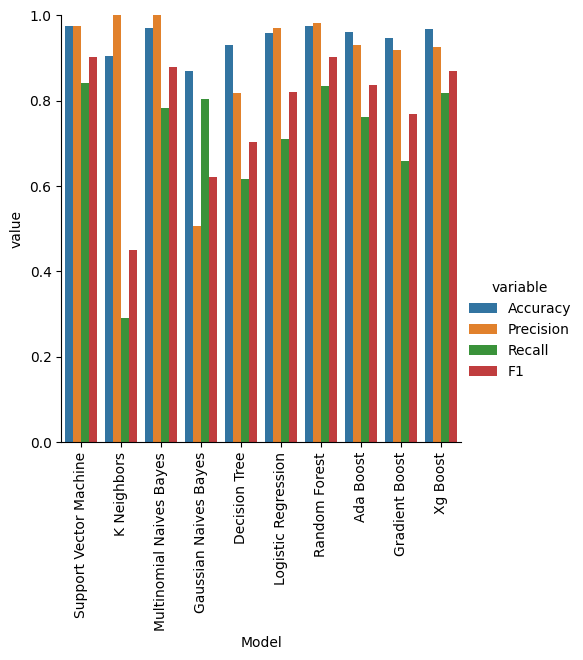

In [84]:

sns.catplot(x = 'Model', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Voting Classifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rfc), ('mnb', mnb)],voting='soft')

In [87]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('mnb', MultinomialNB())],
                 voting='soft')

In [88]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("F1",f1_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243
Recall 0.8478260869565217
F1 0.9105058365758755


# MODEL SAVING

In [91]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [92]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))